In [158]:
import pandas as pd
import os

In [159]:
dir=r"C:\Users\vichu\Documents\assign\Inputfiles"
df=pd.read_csv(os.path.join(dir,"carMPG.csv"))

In [161]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2015,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2015,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2015,1,ford torino


In [162]:
df=df.drop(columns=['Horsepower','Car_Name'])

In [163]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Weight', 'Acceleration',
       'Model_year', 'Origin'],
      dtype='object')

In [164]:
features=['Cylinders', 'Displacement', 'Weight', 'Acceleration',
       'Model_year', 'Origin']

In [165]:
X_train=df[features]

In [166]:
y=df['MPG']

## since it is univariate lets try to choose best feature using Decision trees

In [167]:
from sklearn import tree

In [168]:
feature_selector=tree.DecisionTreeRegressor()

In [169]:
feature_selector.fit(X_train,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [170]:
import matplotlib.pyplot as plt

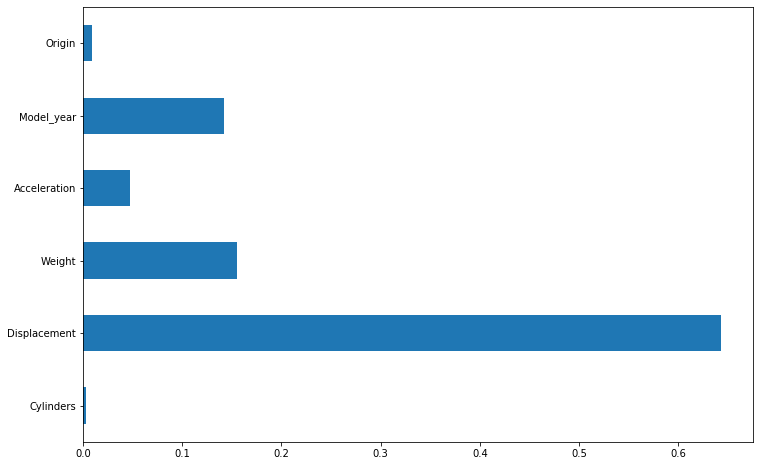

In [171]:
importances=pd.Series(feature_selector.feature_importances_, index=X_train.columns) 
importances.plot(kind='barh', figsize=(12,8))

## Displacement is showing to have higher Importance

In [172]:
df_feat=df['Displacement']

In [173]:
X_train.shape,y_train.shape

((398, 6), (298,))

## Train Test Split

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df_feat, y, test_size=0.25, random_state=2)

In [175]:
X_train=X_train.values.reshape(len(X_train),1)

y_train=y_train.values.reshape(len(y_train),1)
print(X_train.shape, y_train.shape)

(298, 1) (298, 1)


In [176]:
from sklearn import linear_model

In [177]:
lr=linear_model.LinearRegression(n_jobs=-1)

In [180]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [179]:
print(lr.intercept_)

[34.96725013]


In [181]:
print(lr.coef_)

[[-0.06099228]]


In [184]:
X_test=X_test.values.reshape(len(X_test),1)

y_test=y_test.values.reshape(len(y_test),1)
print(X_test.shape, y_test.shape)

(100, 1) (100, 1)


In [185]:
predictions=lr.predict(X_test)

Text(0, 0.5, 'Residual')

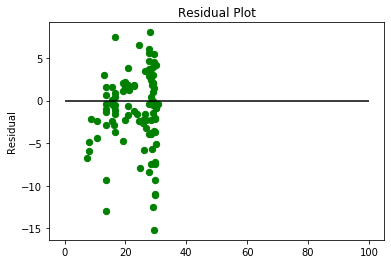

In [187]:
plt.scatter(predictions,predictions-y_test,c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=100)
plt.title('Residual Plot')
plt.ylabel('Residual')

In [188]:
from sklearn import metrics

In [190]:
r2=metrics.r2_score()

In [191]:
r2(predictions,y_test)

0.5155044136270057

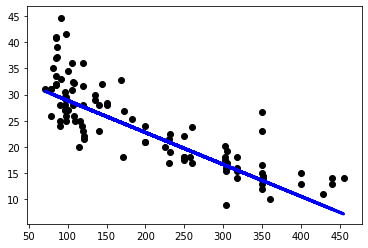

In [192]:
plt.plot(X_test, predictions, color='blue',linewidth=3)
plt.scatter(X_test,y_test,  color='black')

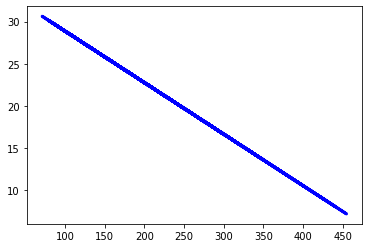

In [194]:
plt.plot(X_test, predictions, color='blue',linewidth=3)

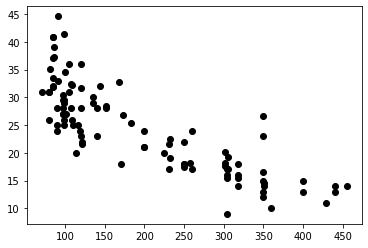

In [195]:
plt.scatter(X_test,y_test,color='black')

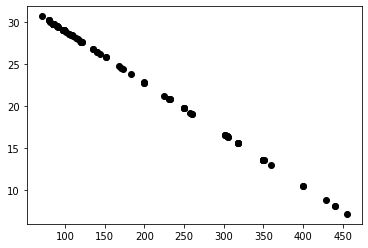

In [196]:
plt.scatter(X_test,predictions,color='black')